# import

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix
import math
import numpy as np
from matplotlib import pyplot as plt



# loading the dataset

In [3]:
(X_train,Y_train) , (X_test,Y_test) = datasets.cifar10.load_data()
X_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


(10000, 32, 32, 3)

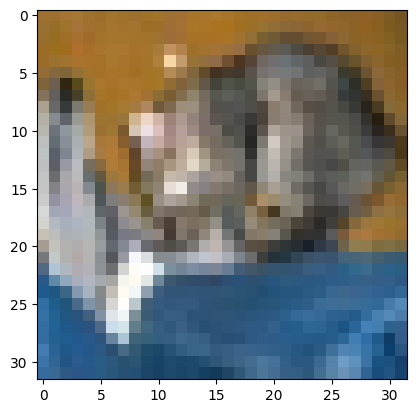

In [4]:
plt.imshow(X_test[0])

In [5]:
Y_train=Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane" , "automobile" , "bird" , "car" , "deer" , "dog" ,"frog" ,"horse" ,"ship" , "truck"]

In [9]:
def plot_sample(X,y, index):
    plt.figure(figsize= (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

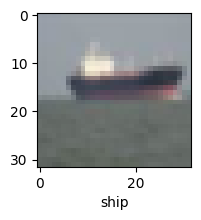

In [10]:
plot_sample(X_train,Y_train,69)

# scaling the features

In [11]:
X_train = X_train/255
X_test = X_test/225

# implementing ANN aproch (normal neural network)

In [12]:


# Define the model
ANN = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Compile the model
ANN.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


early_stopping = EarlyStopping(
    monitor='accuracy',   # or 'val_accuracy' if monitoring validation accuracy
    patience=15,          # Number of epochs with no improvement after which training will be stopped
    mode='max',           # Mode 'max' because we want to maximize accuracy
    restore_best_weights=True
    # Restores model weights from the epoch with the best accuracy
)

# Train the model and store the history
history = ANN.fit(
    X_train, Y_train,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=(X_test, Y_test)
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3059 - loss: 1.9329 - val_accuracy: 0.3953 - val_loss: 1.7082
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4222 - loss: 1.6455 - val_accuracy: 0.4309 - val_loss: 1.6082
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4500 - loss: 1.5556 - val_accuracy: 0.4248 - val_loss: 1.6287
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4742 - loss: 1.4895 - val_accuracy: 0.4819 - val_loss: 1.4888
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4921 - loss: 1.4399 - val_accuracy: 0.4239 - val_loss: 1.6478
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5104 - loss: 1.4003 - val_accuracy: 0.4855 - val_loss: 1.4470
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5264 - loss: 1.3491 - val_accuracy: 0.4894 - val_loss: 1.4084
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5392 - loss: 

In [13]:
# Get the best accuracy from the history
best_accuracy = max(history.history['accuracy'])  # or 'val_accuracy' for validation accuracy
best_val_accuracy = max(history.history['val_accuracy'])

print(f"Best Training Accuracy: {best_accuracy:.4f}")
print(f"Best Training val_Accuracy: {best_val_accuracy:.4f}")

Best Training Accuracy: 0.9946
Best Training val_Accuracy: 0.5788


In [14]:
ANN.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5691 - loss: 2.2803


[2.307882308959961, 0.5698999762535095]

In [15]:
y_pred=ANN.predict(X_test)
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:8]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[3, 8, 0, 0, 4, 6, 1, 6]

# classification report & confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


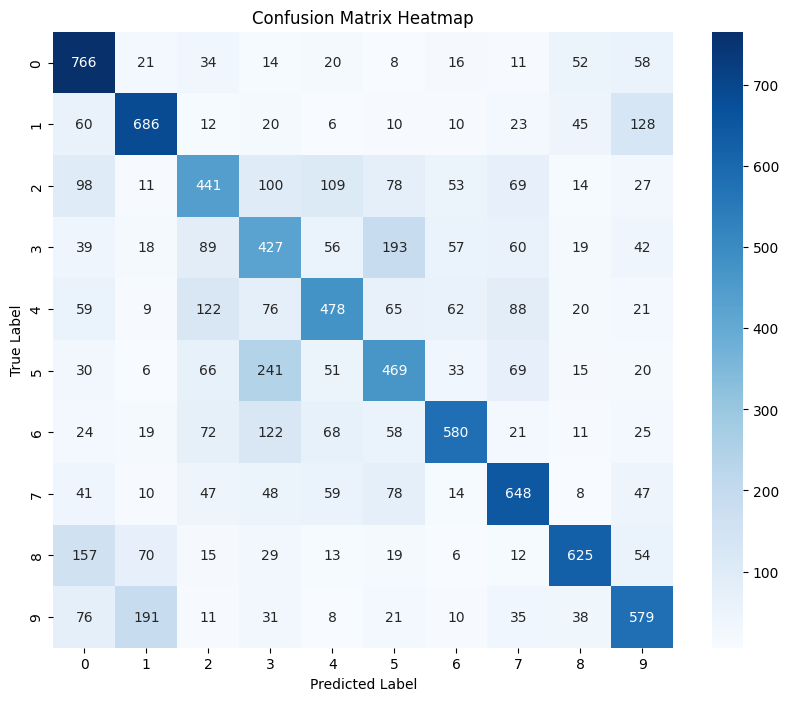

In [31]:
# Generate predictions
y_pred = ANN.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with highest probability
y_true = Y_test  # True labels

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [21]:

#y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.77      0.65      1000
           1       0.66      0.69      0.67      1000
           2       0.49      0.44      0.46      1000
           3       0.39      0.43      0.41      1000
           4       0.55      0.48      0.51      1000
           5       0.47      0.47      0.47      1000
           6       0.69      0.58      0.63      1000
           7       0.63      0.65      0.64      1000
           8       0.74      0.62      0.68      1000
           9       0.58      0.58      0.58      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



# implimenting the CNN aproach

In [25]:


cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])




In [26]:


cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='accuracy',
    patience=15,
    mode='max',
    restore_best_weights=True
)


In [27]:
history = cnn.fit(
    X_train, Y_train,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=(X_test, Y_test)
)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3395 - loss: 1.7857 - val_accuracy: 0.4966 - val_loss: 1.4132
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5522 - loss: 1.2600 - val_accuracy: 0.5532 - val_loss: 1.2603
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6194 - loss: 1.0782 - val_accuracy: 0.6417 - val_loss: 1.0452
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6575 - loss: 0.9745 - val_accuracy: 0.6519 - val_loss: 1.0162
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6883 - loss: 0.9017 - val_accuracy: 0.6783 - val_loss: 0.9543
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7069 - loss: 0.8405 - val_accuracy: 0.6806 - val_loss: 0.9391
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7269 - loss: 0.7908 - val_accuracy: 0.6694 - val_loss: 1.0034
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7362 - loss:

In [29]:
# Get the best accuracy from the history
best_accuracy = max(history.history['accuracy'])  # or 'val_accuracy' for validation accuracy
best_val_accuracy = max(history.history['val_accuracy'])

print(f"Best Training Accuracy: {best_accuracy:.4f}")
print(f"Best Training val_Accuracy: {best_val_accuracy:.4f}")

Best Training Accuracy: 0.9613
Best Training val_Accuracy: 0.7098


In [30]:
cnn.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6852 - loss: 3.2038


[3.2354016304016113, 0.680899977684021]

In [33]:
y_predicted=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [34]:
y_predicted[:6]

array([[1.3003115e-06, 6.7801103e-09, 2.1341504e-05, 9.8840082e-01,
        9.4779115e-03, 2.7860715e-06, 1.2503198e-04, 1.3576927e-07,
        1.9706765e-03, 3.2648138e-08],
       [2.0660643e-06, 6.5077549e-01, 1.2835443e-20, 4.7713691e-26,
        5.5491865e-30, 9.3434350e-38, 5.2928154e-35, 3.8428170e-35,
        3.4922245e-01, 4.2013745e-10],
       [5.2155331e-02, 2.4451707e-03, 3.4946518e-10, 9.5212854e-05,
        2.3015910e-10, 4.8699558e-08, 1.7597025e-11, 7.3618292e-11,
        9.4467318e-01, 6.3112879e-04],
       [1.0000000e+00, 4.8536821e-17, 9.7778148e-17, 8.7743953e-28,
        5.8633135e-30, 7.4268819e-44, 1.6478610e-36, 6.2016892e-37,
        3.4029330e-08, 1.2735385e-21],
       [4.2303341e-24, 4.7656347e-21, 1.1461943e-09, 1.9851318e-07,
        3.5973608e-01, 3.0849073e-12, 6.4026368e-01, 1.3707006e-13,
        8.9102062e-21, 1.2557851e-25],
       [2.7881129e-13, 1.4664303e-16, 1.6854161e-08, 8.5482323e-09,
        2.3532795e-08, 2.6916436e-12, 1.0000000e+00, 5.06

In [35]:
y_classes=[np.argmax(element) for element in y_predicted]
y_classes[:8]

[3, 1, 8, 0, 6, 6, 7, 6]

In [37]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
#y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_predicted]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.77      0.71      1000
           1       0.87      0.77      0.82      1000
           2       0.61      0.54      0.57      1000
           3       0.46      0.54      0.49      1000
           4       0.63      0.62      0.62      1000
           5       0.62      0.53      0.57      1000
           6       0.72      0.79      0.75      1000
           7       0.74      0.69      0.71      1000
           8       0.75      0.82      0.78      1000
           9       0.78      0.76      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


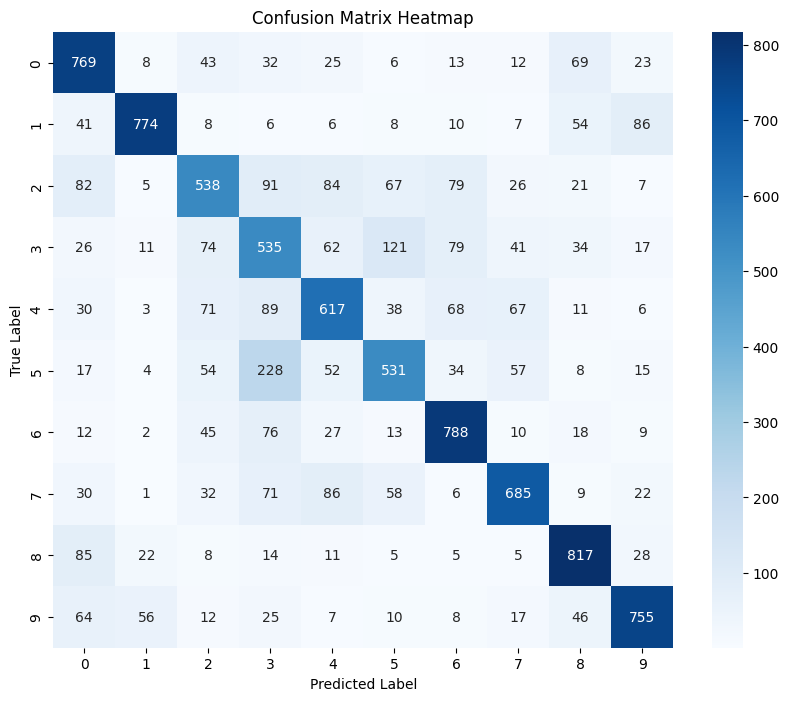

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

# Generate predictions
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with highest probability
y_true = Y_test  # True labels

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()
